<a href="https://colab.research.google.com/github/zeyneplacin/BrainMRI/blob/main/Uygulamal%C4%B1_Yapay_Zeka__v0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import torch
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import torchvision
import matplotlib.pyplot as plt
from google.colab import drive

In [2]:
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data_path = './drive/MyDrive/Gazi Üniversitesi/Uygulamalı Yapay Zeka/2020 dataset_pre processed/Gazi_BRAIN_2020_Dataset'
tumor_path = data_path + '/Tumor'
normal_path = data_path + '/Normal'

In [4]:
os.listdir(data_path)


['readme.txt', 'Tumor', 'Normal']

In [ ]:
os.listdir(tumor_path)


In [ ]:
os.listdir(normal_path)

## veri setini oluşturma. yukarıda alınan pathlerden data seti karıştırılıyor.

In [7]:
from genericpath import isfile
class BrainDataset(Dataset):
    def __init__(self, data_dir, transform = None):
        #store filenames
        labls = os.listdir(data_dir)
        print (labls) #data_dir altindaki dizin isimleri
        self.labelnames = [] # data_dir içerisindeki etiket listesi, distinct olarak tutuluyor.


        self.filenames = [] #bulunan her bir görüntünün adresi tutuluyor örn: './drive/MyDrive/Gazi Üniversitesi/Uygulamalı Yapay Zeka/2020 dataset_pre processed/Gazi_BRAIN_2020_Dataset/Tumor/img226.jpg'

        for f in labls:
          basedir = os.path.join(data_dir, f) #basedir = data_dir ve alt dizinin birlesmis hali
          if os.path.isfile(basedir):
            pass #readme.txt okunmadan atlanıyor.
          else:
            self.labelnames.append(f)
            print ("basedir=", basedir)
            images = os.listdir(basedir) #basedir altindaki resimlerin listesi
            print (images)
            fnames = [os.path.join(basedir, im) for im in images] #resimlerin tam dizinli dosya ismi
            self.filenames.extend(fnames)
            print('dosya isimleri: ', self.filenames)
            print ('dosya sayısı: ', len(self.filenames))

        print('etiketler: ', self.labelnames)
        #etiketler dosya isminden aliniyor
        self.labels = [filename.split('/')[-2] for filename in self.filenames] #bulunan her bir görüntünün sırasıyla etiketlerini tutuyor.
        print ("labels:", self.labels)
        self.transform = transform

    def __len__(self):
        #goruntu listesinin boyutunu dondurur
        return len(self.filenames)

    def numberOfSamples(self):
      a= self.__len__()
      print(type(a))
      return a

    def __getitem__(self, idx):
        #goruntu aciliyor, donusum uygulaniyor ve etiketiyle birlikte donduruluyor
        image = Image.open(self.filenames[idx])  # PIL image
        #image = self.transform(image)
        label = self.name_to_idx(self.labels[idx])

        #print ('image', type(image))
        #print ('label', type(label))
        return image, label
    def name_to_idx(self, lblname):
        return self.labelnames.index(lblname)
    def idx_to_name(self, lblidx):
        return self.labelnames[lblidx]

In [8]:
brain_dataset = BrainDataset(data_path)
print('verisetindeki veri sayısı: ', brain_dataset.numberOfSamples())

['readme.txt', 'Tumor', 'Normal']
basedir= ./drive/MyDrive/Gazi Üniversitesi/Uygulamalı Yapay Zeka/2020 dataset_pre processed/Gazi_BRAIN_2020_Dataset/Tumor
['img226.jpg', 'img70.jpg', 'img4.jpg', 'img144.jpg', 'img84.jpg', 'img348.jpg', 'img35.jpg', 'img346.jpg', 'img135.jpg', 'img18.jpg', 'img134.jpg', 'img97.jpg', 'img406.jpg', 'img394.jpg', 'img200.jpg', 'img231.jpg', 'img330.jpg', 'img87.jpg', 'img0.jpg', 'img137.jpg', 'img391.jpg', 'img192.jpg', 'img297.jpg', 'img186.jpg', 'img25.jpg', 'img311.jpg', 'img333.jpg', 'img187.jpg', 'img207.jpg', 'img235.jpg', 'img204.jpg', 'img259.jpg', 'img100.jpg', 'img267.jpg', 'img131.jpg', 'img156.jpg', 'img195.jpg', 'img95.jpg', 'img141.jpg', 'img92.jpg', 'img193.jpg', 'img266.jpg', 'img105.jpg', 'img171.jpg', 'img400.jpg', 'img19.jpg', 'img396.jpg', 'img63.jpg', 'img125.jpg', 'img323.jpg', 'img24.jpg', 'img281.jpg', 'img81.jpg', 'img107.jpg', 'img13.jpg', 'img289.jpg', 'img284.jpg', 'img28.jpg', 'img293.jpg', 'img27.jpg', 'img6.jpg', 'img379.jpg

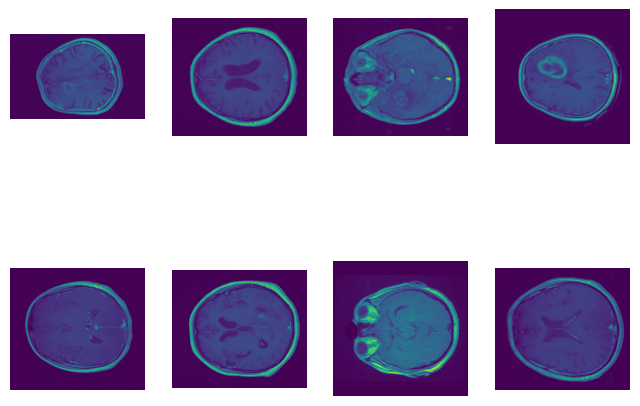

In [9]:
t2img = torchvision.transforms.ToPILImage()
img2t = torchvision.transforms.ToTensor()

def display_image_grid(images, images_per_row=8):
    if isinstance(images, torch.Tensor):
        images = images.split(1, dim=0)
        images = map(lambda x: x.squeeze(0), images)
        images = list(map(t2img, images))
    elif isinstance(images, list):
        # Expect a list of PIL Images
        if isinstance(images[0], torch.Tensor):
            images = list(map(t2img, images))
        # end if
    elif isinstance(images, Image):
        images = [images]
    else:
        raise RuntimeError(f"Hata: {type(images)}")
    # end if

    num_images = len(images)
    num_rows = (num_images + images_per_row - 1) // images_per_row
    fig = plt.figure(figsize=(images_per_row * 2, num_rows * 3))

    for i in range(1, num_images + 1):
        plt.subplot(num_rows, images_per_row, i)
        plt.axis("off")
        plt.imshow(images[i-1])
    # end for

    plt.show()

display_image_grid([
    brain_dataset[0][0],
    brain_dataset[21][0],
    brain_dataset[16][0],
    brain_dataset[130][0],
    brain_dataset[433][0],
    brain_dataset[73][0],
    brain_dataset[148][0],
    brain_dataset[256][0],
], 4)